**Exercise 1**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
#dataset
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

#Normalize input data by using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X-avg) / (maxi - mini)
    X_b = np.c_[np.ones((N,1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)


In [4]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # thetas = np.random.randn(4,1) # uncomment this line for real application
    thetas = np.array([[1.16270837], [-0.81960489], [1.39501033] ,[0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N) #In real application, you should use this code
            random_index = i # This code is used for this assignment only

            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            #Compute output
            y_hat = thetas.T.dot(xi.T)

            #Compute loss li
            loss = ((y_hat-yi[0])**2)/2

            #Compute gradient
            gradient_loss = (y_hat-yi)*(xi.T)

            #Update theta
            thetas = thetas - learning_rate*gradient_loss

            #logging
            losses.append(loss[0][0])

    return thetas_path, losses

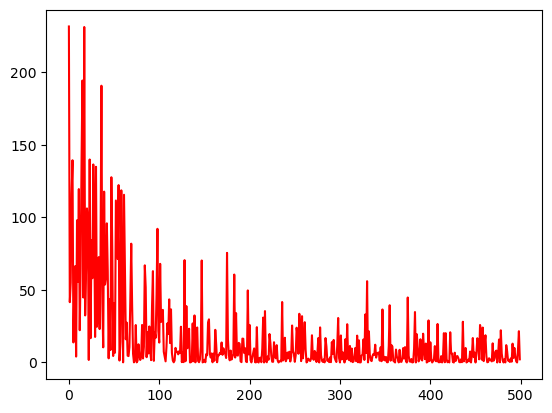

In [5]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color='r')
plt.show()

In [6]:
# Question 1: My answer is B
sgd_theta, losses = stochastic_gradient_descent (X_b , y, n_epochs=1, learning_rate= 0.01)
print(np.sum(losses))

6754.643359356192


In [7]:
# minibatch

def mini_batch_gradient_descent(X_b , y, n_epochs =50 , minibatch_size=20, learning_rate=0.01):
    # thetas = np.random.randn(4, 1)
    thetas = np.array([[1.16270837], [-0.81960489], [1.39501033] ,[0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range (n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application
        shuffled_indices = np. asarray ([21 , 144 , 17, 107 , 37, 115 , 167 , 31, 3,
        132 , 179 , 155 , 36, 191 , 182 , 170 , 27, 35, 162 , 25, 28, 73, 172 , 152 , 102 , 16,
        185 , 11, 1, 34, 177 , 29, 96, 22, 76, 196 , 6, 128 , 114 , 117 , 111 , 43, 57, 126 ,
        165 , 78, 151 , 104 , 110 , 53, 181 , 113 , 173 , 75, 23, 161 , 85, 94, 18, 148 , 190 ,
        169 , 149 , 79, 138 , 20, 108 , 137 , 93, 192 , 198 , 153 , 4, 45, 164 , 26, 8, 131 ,
        77, 80, 130 , 127 , 125 , 61, 10, 175 , 143 , 87, 33, 50, 54, 97, 9, 84, 188 , 139 ,
        195 , 72, 64, 194 , 44, 109 , 112 , 60, 86, 90, 140 , 171 , 59, 199 , 105 , 41, 147 ,
        92, 52, 124 , 71, 197 , 163 , 98, 189 , 103 , 51, 39, 180 , 74, 145 , 118 , 38, 47,
        174 , 100 , 184 , 183 , 160 , 69, 91, 82, 42, 89, 81, 186 , 136 , 63, 157 , 46, 67,
        129 , 120 , 116 , 32, 19, 187 , 70, 141 , 146 , 15, 58, 119 , 12, 95, 0, 40, 83, 24,
        168 , 150 , 178 , 49, 159 , 7, 193 , 48, 30, 14, 121 , 5, 142 , 65, 176 , 101 , 55,
        133 , 13, 106 , 66, 99, 68, 135 , 158 , 88, 62, 166 , 156 , 2, 134 , 56, 123 , 122 ,
        154])

        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range (0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # compute output:
            y_hat = xi.dot(thetas)

            # compute loss:
            loss = 1/2*(y_hat-yi).T.dot(y_hat-yi)

            # compute derivative of loss:
            k = (y_hat - yi)
            gradient_loss = xi.T.dot(k)

            # compute derivative of parameters:
            gradients = gradient_loss/minibatch_size

            # update parameters:
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path , losses

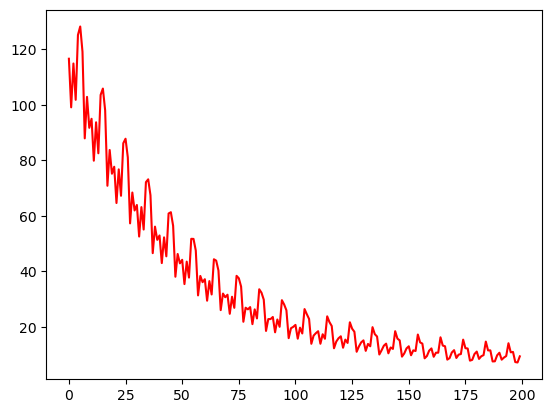

In [8]:
mbgd_thetas,losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,minibatch_size=20, learning_rate =0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color ="r")
plt.show()

In [9]:
# Question 2: My answer is D
mbgd_thetas,losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,minibatch_size=20,learning_rate=0.01)
print(round(sum(losses) ,2))

8865.65


In [10]:
# N nample

def batch_gradient_descent(X_b , y,n_epochs =100, learning_rate=0.01):
    # thetas = np.random.randn(4, 1)
    thetas = np.array([[1.16270837], [-0.81960489], [1.39501033] ,[0.29763545]])

    thetas_path = [thetas]
    losses = []

    N = len(X_b)

    for epoch in range (n_epochs):
        # compute output:
        y_hat = X_b.dot(thetas)

        # compute loss:
        loss = (y_hat-y).T.dot(y_hat-y)

        # compute derivative of loss:
        k = 2*(y_hat - y)
        gradient_loss = X_b.T.dot(k)

        # compute derivative of parameters:
        gradients = gradient_loss/N

        # update parameters:
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)

        loss_mean = np.sum(loss)/N
        losses.append(loss_mean)

    return thetas_path , losses

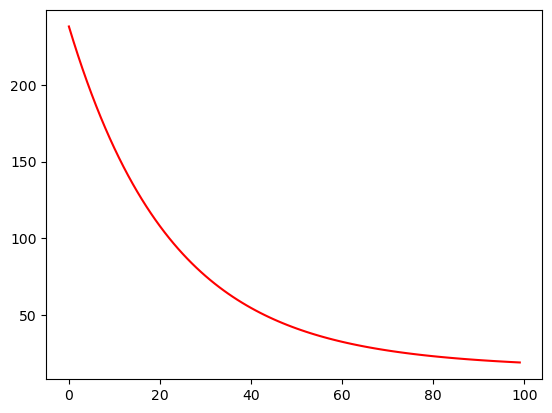

In [11]:
bgd_thetas,losses = batch_gradient_descent(X_b, y,n_epochs=100,learning_rate=0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color = 'r')
plt.show()

In [12]:
# Question 3: my answer is C
bgd_thetas, losses = batch_gradient_descent(X_b , y, n_epochs =100 , learning_rate=0.01)
print(round(sum(losses) ,2))

6716.46


**Exercise 2**

In [13]:
import pandas as pd

# load dataset
df = pd.read_csv("BTC-Daily.csv")

# remove duplicate rows
df = df.drop_duplicates()

2014-11-28 to 2022-03-01


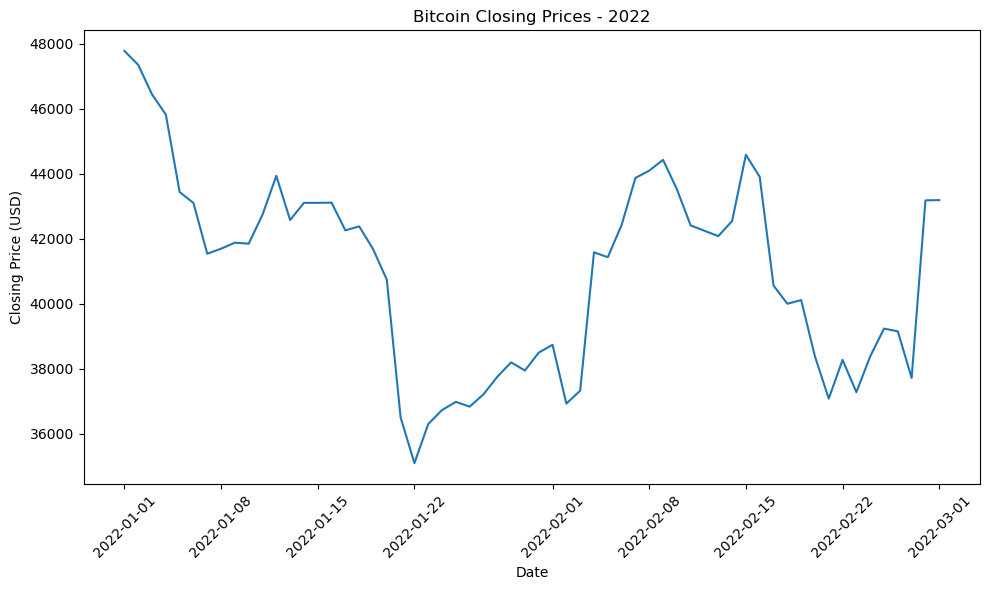

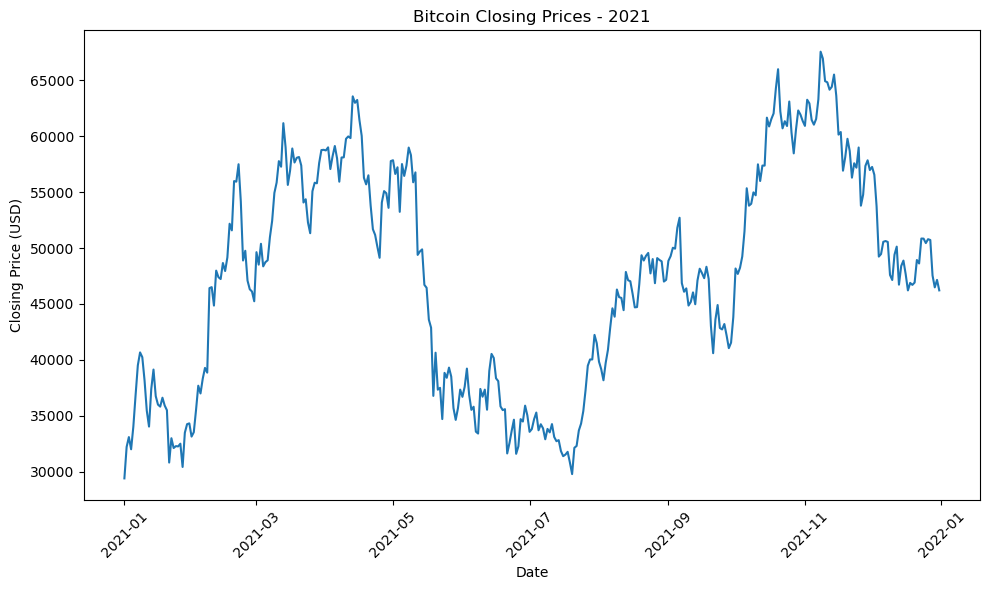

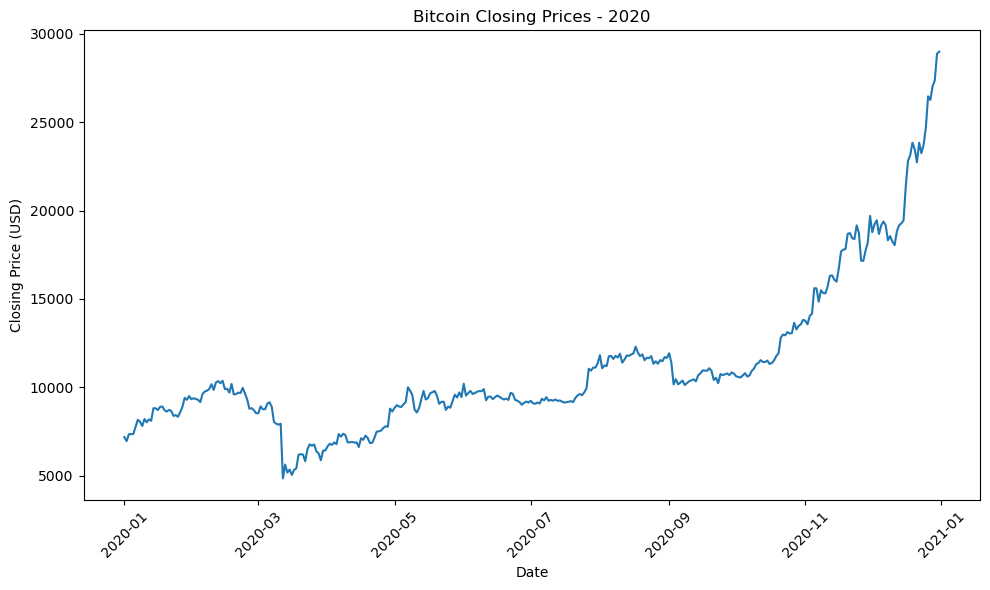

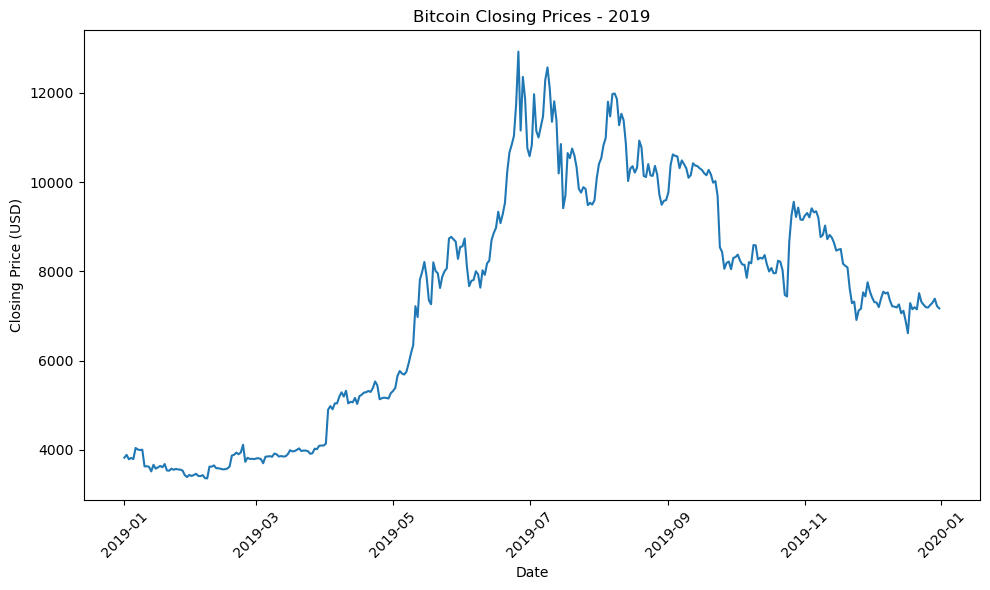

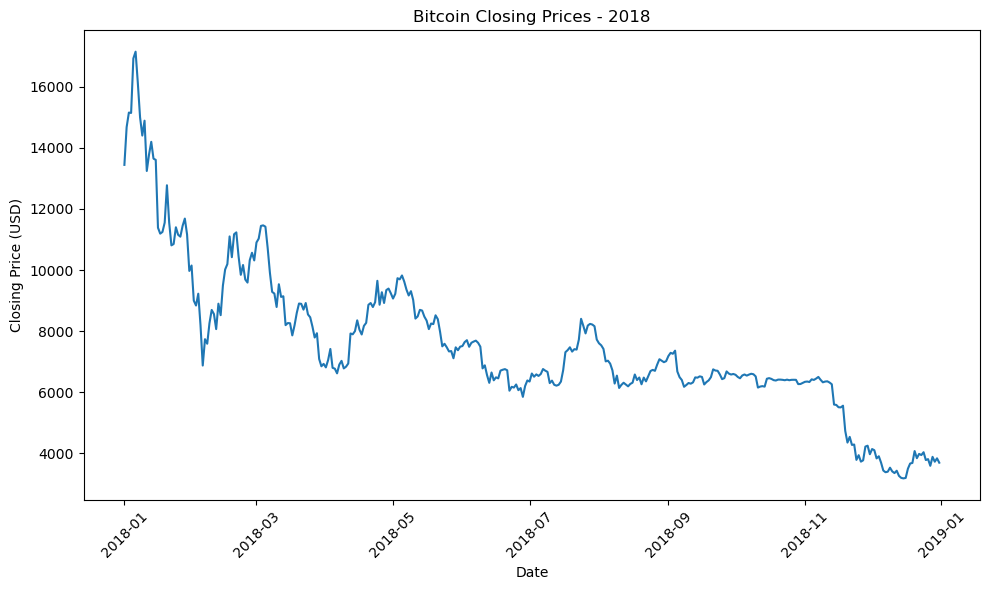

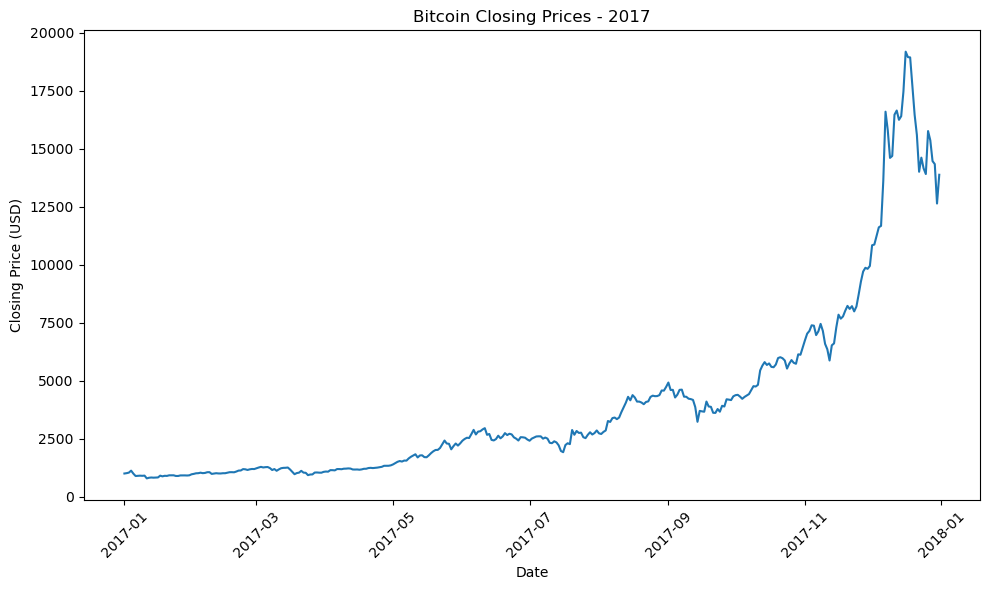

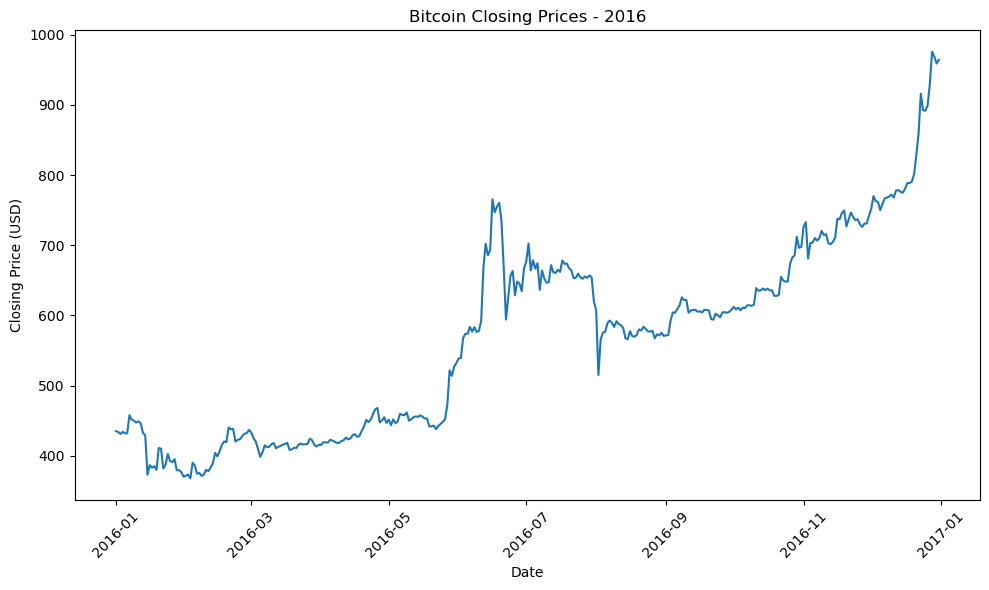

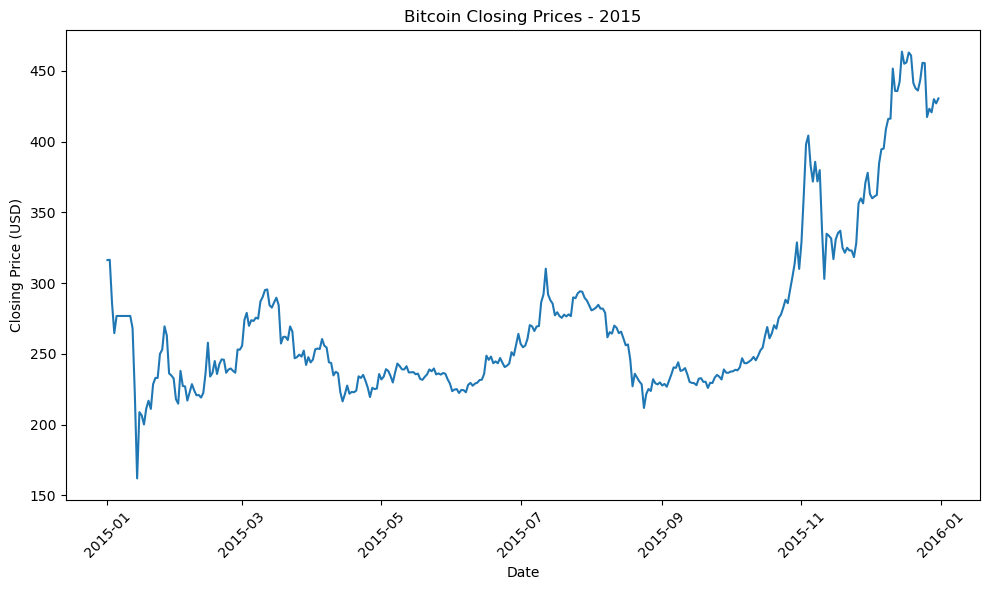

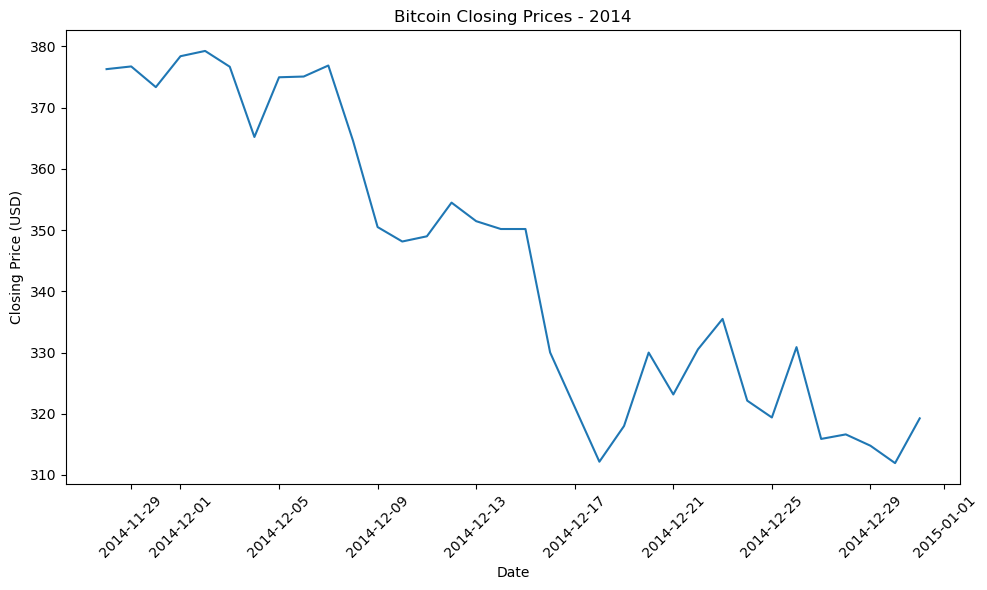

In [14]:
# Range of days covered
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max()) 
print(date_range)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

unique_years = df['year'].unique()
data = pd.date_range(str(df['date'].dt.year.min())+'-01-01',str(df['date'].dt.year.max()+1)+'-01-01')
year_month_day_big = pd.DataFrame(data, columns=['date'])
year_month_day_big['year'] = year_month_day_big['date'].dt.year
year_month_day_big['month'] = year_month_day_big['date'].dt.month
year_month_day_big['day'] = year_month_day_big['date'].dt.day

for year in unique_years:
    year_month_day = year_month_day_big[year_month_day_big['year']==year]
    merged_data = pd.merge(year_month_day,df, on=['year','month','day'], how='left')
    plt.figure(figsize=(10,6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation =45)
    plt.tight_layout()
    plt.show()

In [15]:
# Question 4: my answer is D

In [16]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

C:\Users\yptn2\AppData\Local\Temp\ipykernel_22620\3611989120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


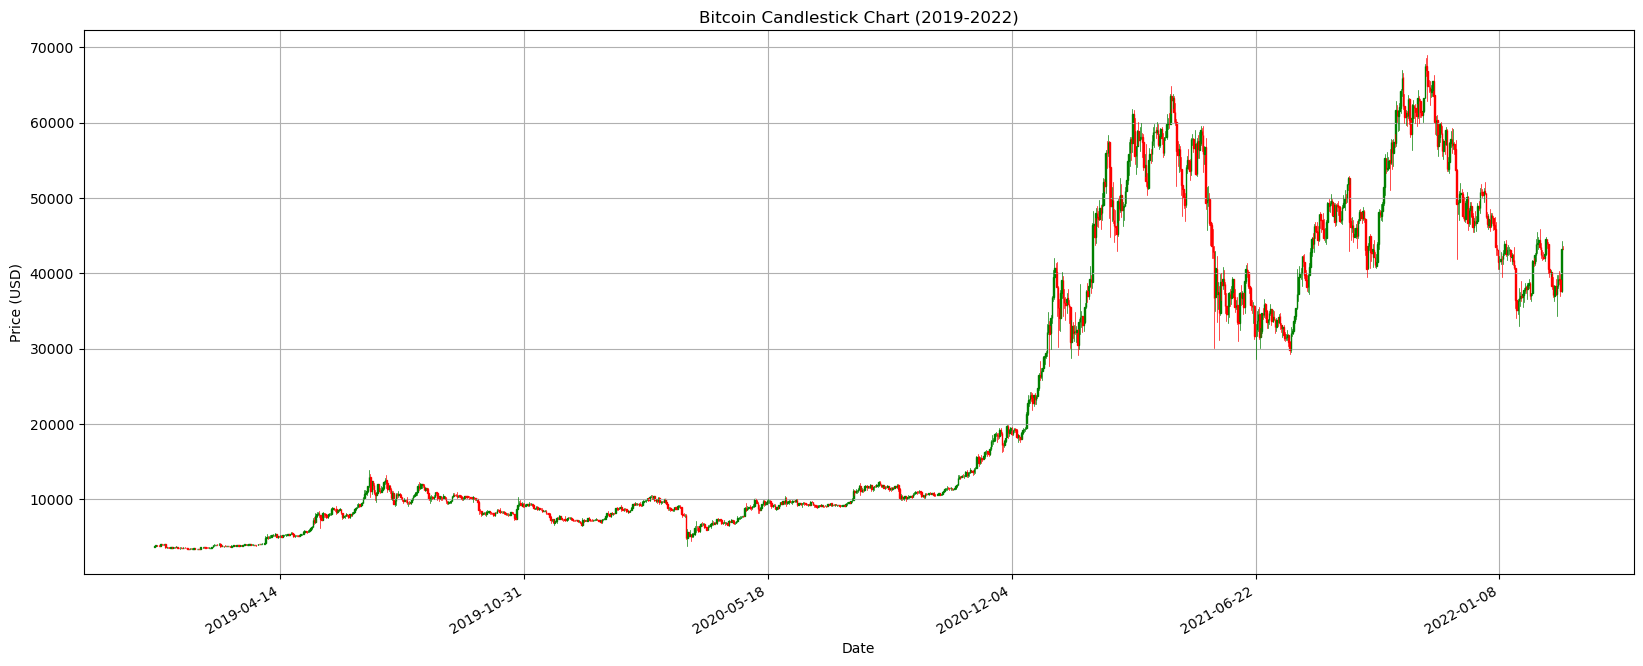

In [17]:
# Filter data 2019 to 2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize =(20 , 8))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6,
                 colorup = 'g', colordown = 'r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('btc_candlestick_2019_2022.pdf')

plt.show()

In [18]:
def predict(X, w, b):
    return X.dot(w) + b

def gradient(y_hat, y, x):
    loss = y_hat - y
    dw = x.T.dot(loss)/len(y)
    db = np.sum(loss)/len(y)
    cost = np.sum(loss**2)/(2*len(y))
    return (dw, db, cost)

def update_weight(w, b, lr, dw, db):
    w_new = w - lr*dw
    b_new = b - lr*db
    return w_new, b_new

In [19]:
# Question 5: My answer is D
# Question 6: My answer is A
# Question 7: My answer is D
# Question 8: My answer is C

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scalar = StandardScaler()

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

X = df[['Standardized_Open_Prices','Standardized_High_Prices','Standardized_Low_Prices']]
y = df['Standardized_Close_Prices']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle=True)


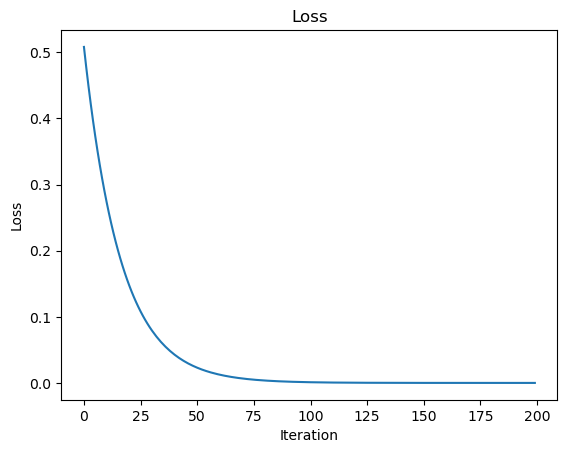

In [22]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)     # Initialize weights 
    b = 0   # Initialize bias
    losses = []
    for _ in range(num_iterations):
        y_hat = predict(X, w, b)
        dw, db, cost = gradient(y_hat, y, X)
        w, b = update_weight(w, b, learning_rate, dw, db)
        losses.append(cost)
    return w, b, losses

w, b, losses = linear_regression_vectorized(X_train.values, y_train.values, learning_rate=0.01, num_iterations=200)

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss")
plt.show()

In [25]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on training data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


In [ ]:
# Question 9: My answer is A

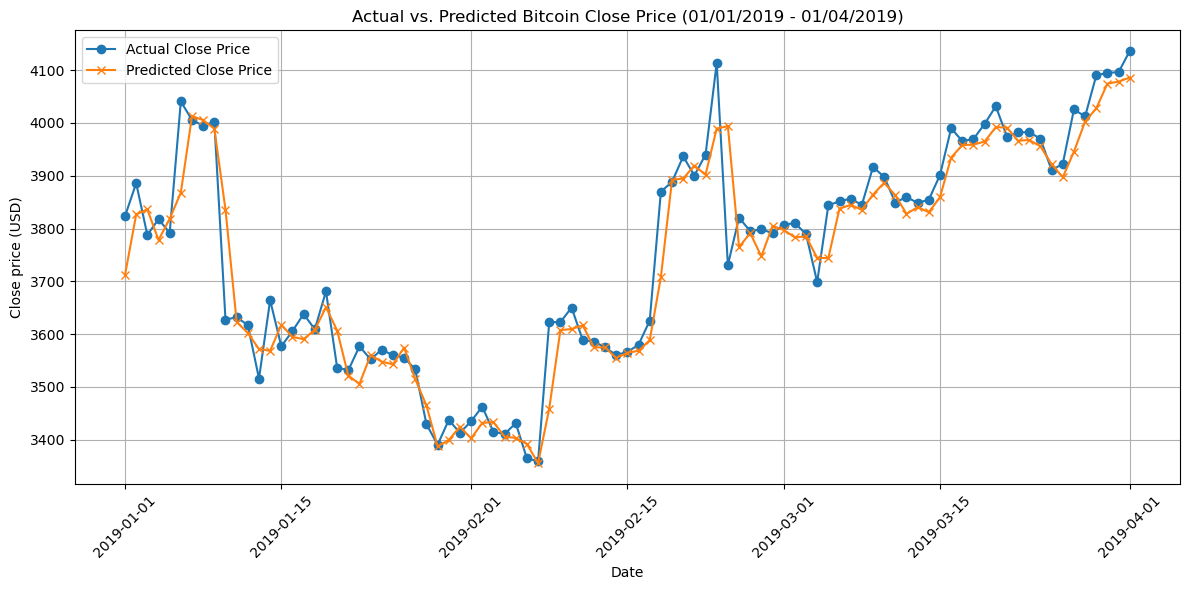

In [27]:
# Filter data for 2019-01-01 to 2019-04-01
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Prepare X and y for prediction
X_2019_q1 = df_2019_q1[['open', 'high', 'low']]
y_2019_q1_actual = df_2019_q1['close']

y_2019_q1_pred = predict(X_2019_q1, w, b)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_q1['date'], y_2019_q1_actual, label = "Actual Close Price", marker = 'o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred, label = "Predicted Close Price", marker = 'x')
plt.title("Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 01/04/2019)")
plt.xlabel("Date")
plt.ylabel("Close price (USD)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()